# Mathematics for AI (23MAT231M)


# Title:" Enhancing Cancer Diagnosis Accuracy through Hooke-Jeeves-Based Hyperparameter Optimization in Logistic Regression"

Team Details:

• Name 1: Suchita Srivastava, Roll No: CB.EN.U4EEE22046

• Name 2: Vaishnavi Sharma, Roll No: CB.EN.U4EEE22055

• Semester: 6

# Abstract: 
This report presents a comprehensive analysis of breast cancer diagnosis using machine learning techniques,
focusing on hyperparameter optimization through the Hooke-Jeeves algorithm, logistic regression
classification, and singular value decomposition (SVD) for dimensionality analysis. The study achieved an
impressive 98.25% accuracy in classifying malignant and benign tumors, demonstrating the effectiveness of
these combined approaches in medical diagnostics.

# Methodology Overview: 
Our approach consists of three main components:
1. Hyperparameter Optimization: Using the Hooke-Jeeves pattern search algorithm to find optimal
parameters for logistic regression (C value and maximum iterations)
2. Classification: Implementing logistic regression with optimized parameters for tumor classification
(malignant vs. benign)
3. Dimensionality Analysis: Applying singular value decomposition to understand feature importance
and data structure

# Dataset Description: 
The Wisconsin Breast Cancer Dataset contains 569 samples with 30 real-valued features computed from
digitized images of breast mass FNA. These features describe characteristics of cell nuclei present in the
images, including:
• Radius (mean of distances from centre to points on the perimeter)
• Texture (standard deviation of gray-scale values)
• Perimeter
• Area
• Smoothness (local variation in radius lengths)
• Compactness (perimeter² / area - 1.0)
• Concavity (severity of concave portions of the contour)
• Concave points (number of concave portions of the contour)
• Symmetry
• Fractal dimension ("coastline approximation" - 1)
Each feature is calculated for three measures: mean, standard error, and "worst" (mean of the three largest
values).

# What is the Hooke-Jeeves algorithm?
The Hooke-Jeeves algorithm stands out as a direct search optimization method that excels in environments where gradient information either proves elusive or entirely unattainable. This derivative-free technique consists of two fundamental components: exploratory and pattern moves.
    
Exploratory Moves: At its core, the Hooke-Jeeves algorithm conducts a systematic search around a current point to determine the most promising direction for progression. These exploratory moves are akin to feeling out the terrain in the dark, each step taken with the intent to find a path that leads to improvement.
Pattern Moves: Building on the insights gained from these exploratory steps, the algorithm employs pattern moves, which utilize two points to establish a direction and propel the search forward in larger, more confident strides. This process, reflective of a deep understanding of the search landscape, accelerates the journey towards an optimal solution.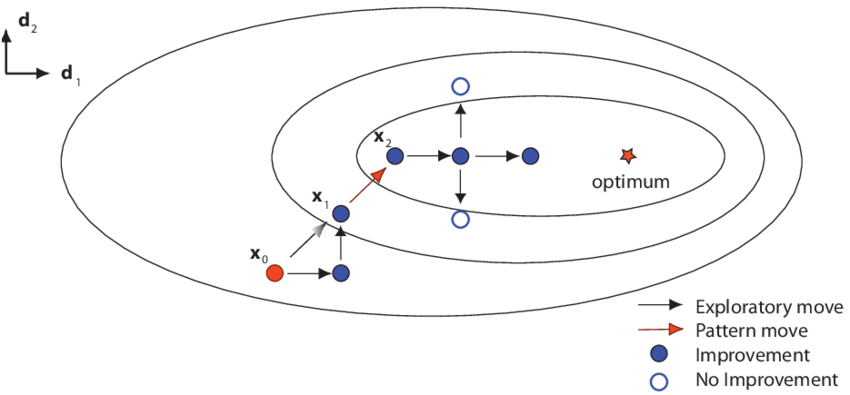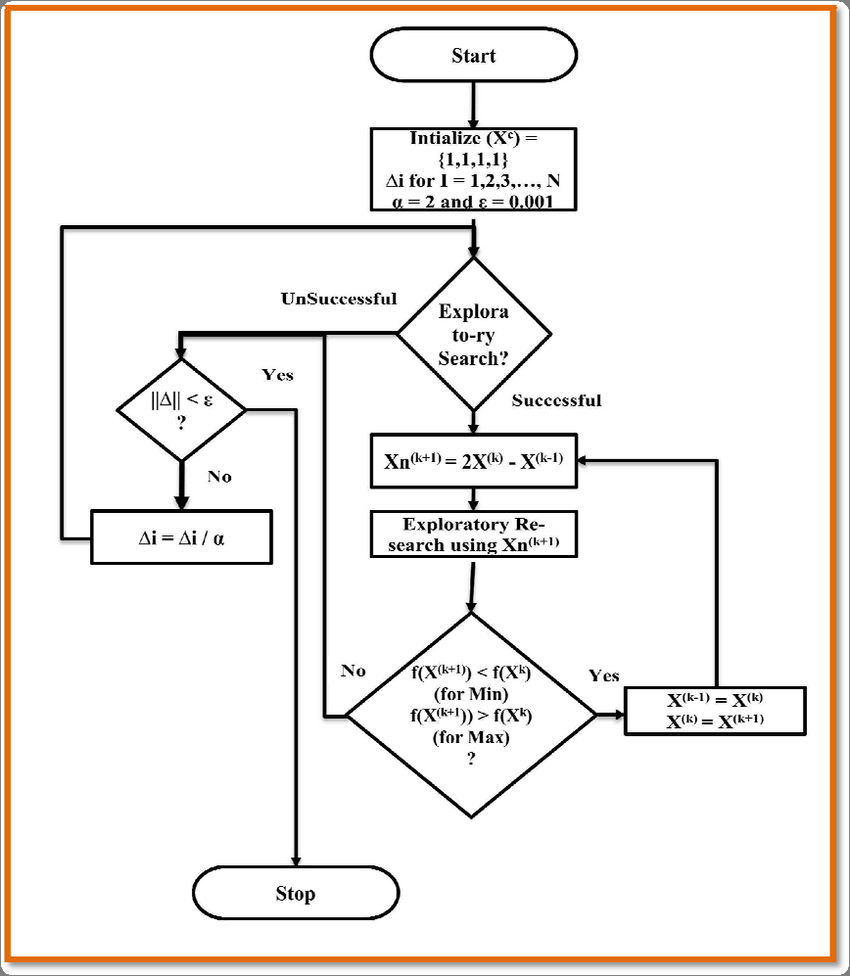

LOGISTIC REGRESSION AND HOOKE AND JEEVES OPTIMIZATION


Best Values Found:
C value      = 0.5000
Max Iters    = 100
Best Accuracy = 98.25%


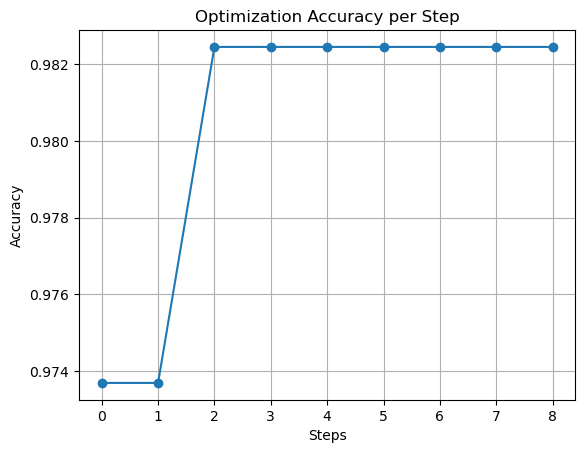

In [18]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_breast_cancer() 
X, y = data.data, data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to check model accuracy for given parameters
def check_accuracy(params):
    c_val, iters = params
    if c_val <= 0 or iters <= 0:
        return float('inf')

    model = LogisticRegression(C=c_val, max_iter=int(iters), solver='lbfgs')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    return -acc  # Negate because we want to maximize accuracy

def hooke_jeeves(func, start, step, stop, reduce=2):
    point = np.array(start)
    best = func(point)
    steps = [(-best, point.copy())]

    while step > stop:
        new_point = point.copy()

        for i in range(len(point)):
            trial = new_point.copy()
            trial[i] += step
            val = func(trial)
            if val < best:
                new_point = trial
                best = val
            else:
                trial[i] -= 2 * step
                val = func(trial)
                if val < best:
                    new_point = trial
                    best = val

        if np.array_equal(new_point, point):
            step /= reduce
        else:
            move = new_point + (new_point - point)
            move_val = func(move)
            if move_val < best:
                point = move
                best = move_val
            else:
                point = new_point

        steps.append((-best, point.copy()))

    return point, -best, steps

start_vals = [1.0, 100]
step_size = 1.0
min_step = 0.01

best_vals, best_acc, steps_list = hooke_jeeves(check_accuracy, start_vals, step_size, min_step)

print("Best Values Found:")
print(f"C value      = {best_vals[0]:.4f}")
print(f"Max Iters    = {int(best_vals[1])}")
print(f"Best Accuracy = {best_acc * 100:.2f}%")

acc_vals = [acc for acc, _ in steps_list]
plt.plot(range(len(acc_vals)), acc_vals, marker='o')
plt.title("Optimization Accuracy per Step")
plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()



Prediction of state (confusion matrix, classification report)

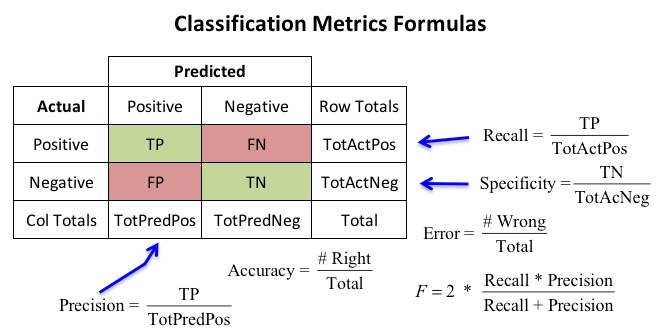

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

final_model = LogisticRegression(C=best_vals[0], max_iter=int(best_p[1]))
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

label_map = {0: 'Malignant', 1: 'Benign'}
actual_labels = [label_map[i] for i in y_test]
predicted_labels = [label_map[i] for i in y_pred]

print("\n Actual vs Predicted Results:")
for i in range(10):  # Show first 10 predictions
    print(f"Sample {i+1}: Actual = {actual_labels[i]}, Predicted = {predicted_labels[i]}")

cm = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:")
print(cm)

print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Malignant", "Benign"]))


Actual vs Predicted Results:
Sample 1: Actual = Benign, Predicted = Benign
Sample 2: Actual = Malignant, Predicted = Malignant
Sample 3: Actual = Malignant, Predicted = Malignant
Sample 4: Actual = Benign, Predicted = Benign
Sample 5: Actual = Benign, Predicted = Benign
Sample 6: Actual = Malignant, Predicted = Malignant
Sample 7: Actual = Malignant, Predicted = Malignant
Sample 8: Actual = Malignant, Predicted = Malignant
Sample 9: Actual = Benign, Predicted = Benign
Sample 10: Actual = Benign, Predicted = Benign

Confusion Matrix:
[[39  4]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.97      0.91      0.94        43
      Benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Singular Value Decomposition
(SVD) is a mathematical technique that factorizes any matrix 𝑋
X into three components:
𝑋=𝑈Σ𝑉^𝑇    Where:
U: Left singular vectors (orthogonal)
Σ: Diagonal matrix of singular values (non-negative and sorted in descending order)
V^T: Right singular vectors (orthogonal)

The singular values in Σ represent the amount of variance (or information) captured by each component (or dimension) of the data.

Top 5 Singular Value Variance
When we talk about the top 5 singular value variance, we are referring to how much of the total data's variance is captured by the first 5 singular values.

To quantify this, we compute the explained variance ratio for each singular value:
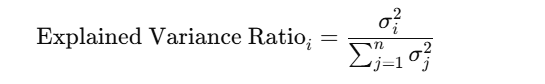
 
This tells us the percentage of total variance explained by each singular value.

The top 5 give us a sense of how well the data can be represented in 5 dimensions instead of the full feature space.

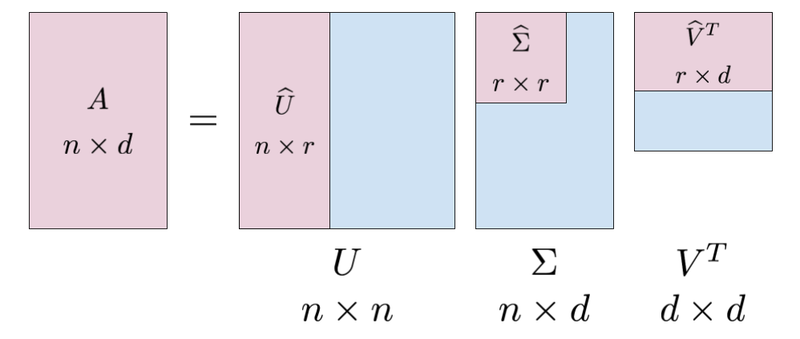


 SVD Results:
U shape: (569, 30)
S (Singular values) shape: (30,)
Vt shape: (30, 30)

 Top 5 Singular Values:
Singular Value 1: 86.9324
Singular Value 2: 56.9068
Singular Value 3: 40.0426
Singular Value 4: 33.5706
Singular Value 5: 30.6289


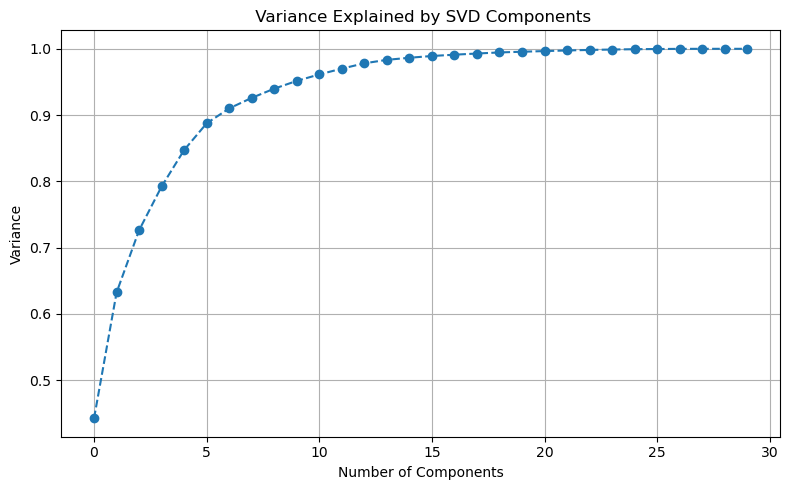

In [4]:
U, S, Vt = np.linalg.svd(X, full_matrices=False)

print("\n SVD Results:")
print(f"U shape: {U.shape}")
print(f"S (Singular values) shape: {S.shape}")
print(f"Vt shape: {Vt.shape}")

#indicate how much variance each component explains
print("\n Top 5 Singular Values:")
for i, val in enumerate(S[:5], 1):
    print(f"Singular Value {i}: {val:.4f}")

explained_variance = (S ** 2) / np.sum(S ** 2)

# Plot variance explained by each component
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title(" Variance Explained by SVD Components")
plt.xlabel("Number of Components")
plt.ylabel("Variance")
plt.grid(True)
plt.tight_layout()
plt.show()